In [32]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [33]:
pigs = gum.InfluenceDiagram()

h1 = pigs.addChanceNode(gum.LabelizedVariable('h1', 'Healthy ith month', ['healthy', 'ill']))
h2 = pigs.addChanceNode(gum.LabelizedVariable('h2', 'Healthy ith month', ['healthy', 'ill']))
h3 = pigs.addChanceNode(gum.LabelizedVariable('h3', 'Healthy ith month', ['healthy', 'ill']))
h4 = pigs.addChanceNode(gum.LabelizedVariable('h4', 'Healthy ith month', ['healthy', 'ill']))

t1 = pigs.addChanceNode(gum.LabelizedVariable('t1', 'Test result at the end of ith month', ['ill', 'not ill']))
t2 = pigs.addChanceNode(gum.LabelizedVariable('t2', 'Test result at the end of ith month', ['ill', 'not ill']))
t3 = pigs.addChanceNode(gum.LabelizedVariable('t3', 'Test result at the end of ith month', ['ill', 'not ill']))

d1 = pigs.addDecisionNode(gum.LabelizedVariable('d1', 'give treatment at the end of ith month', ['give', 'dont give']))
d2 = pigs.addDecisionNode(gum.LabelizedVariable('d2', 'give treatment at the end of ith month', ['give', 'dont give']))
d3 = pigs.addDecisionNode(gum.LabelizedVariable('d3', 'give treatment at the end of ith month', ['give', 'dont give']))

u1 = pigs.addUtilityNode(gum.LabelizedVariable('u1', 'price of treatment', 1))
u2 = pigs.addUtilityNode(gum.LabelizedVariable('u2', 'price of treatment', 1))
u3 = pigs.addUtilityNode(gum.LabelizedVariable('u3', 'price of treatment', 1))
u4 = pigs.addUtilityNode(gum.LabelizedVariable('u4', 'price of treatment', 1))

In [34]:
pigs.addArc(h1, t1)
pigs.addArc(t1, d1)
pigs.addArc(d1, u1)

pigs.addArc(h2, t2) 
pigs.addArc(t2, d2) 
pigs.addArc(d2, u2)

pigs.addArc(h3, t3) 
pigs.addArc(t3, d3) 
pigs.addArc(d3, u3)

pigs.addArc(h4, u4)

pigs.addArc(h1, h2)
pigs.addArc(h2, h3)
pigs.addArc(h3, h4)

pigs.addArc(d1, h2)
pigs.addArc(d2, h3)
pigs.addArc(d3, h4)

In [35]:
pigs.cpt(h1).fillWith([0.9, 0.1])

pigs.cpt(h2)[{'h1':'healthy','d1':'give'}] = [0.9, 0.1]
pigs.cpt(h2)[{'h1':'healthy','d1':'dont give'}] = [0.8, 0.2]
pigs.cpt(h2)[{'h1':'ill','d1':'give'}] = [0.5, 0.5]
pigs.cpt(h2)[{'h1':'ill','d1':'dont give'}] = [0.1, 0.9]

pigs.cpt(h3)[{'h2':'healthy','d2':'give'}] = [0.9, 0.1]
pigs.cpt(h3)[{'h2':'healthy','d2':'dont give'}] = [0.8, 0.2]
pigs.cpt(h3)[{'h2':'ill','d2':'give'}] = [0.5, 0.5]
pigs.cpt(h3)[{'h2':'ill','d2':'dont give'}] = [0.1, 0.9]

pigs.cpt(h4)[{'h3':'healthy','d3':'give'}] = [0.9, 0.1]
pigs.cpt(h4)[{'h3':'healthy','d3':'dont give'}] = [0.8, 0.2]
pigs.cpt(h4)[{'h3':'ill','d3':'give'}] = [0.5, 0.5]
pigs.cpt(h4)[{'h3':'ill','d3':'dont give'}] = [0.1, 0.9]

In [36]:
pigs.cpt(t1)[{'h1':'healthy'}] = [0.1, 0.9]
pigs.cpt(t1)[{'h1':'ill'}] = [0.8, 0.2]

pigs.cpt(t2)[{'h2':'healthy'}] = [0.1, 0.9]
pigs.cpt(t2)[{'h2':'ill'}] = [0.8, 0.2]

pigs.cpt(t3)[{'h3':'healthy'}] = [0.1, 0.9]
pigs.cpt(t3)[{'h3':'ill'}] = [0.8, 0.2]

In [37]:
pigs.utility(u1)[{'d1':'give'}] = -100
pigs.utility(u1)[{'d1':'dont give'}] = 0

pigs.utility(u2)[{'d2':'give'}] = -100
pigs.utility(u3)[{'d2':'dont give'}] = 0

pigs.utility(u3)[{'d3':'give'}] = -100
pigs.utility(u3)[{'d3':'dont give'}] = 0

pigs.utility(u4)[{'h4':'healthy'}] = 1000
pigs.utility(u4)[{'h4':'ill'}] = 300

In [44]:
limid = gum.ShaferShenoyLIMIDInference(pigs)
limid.makeInference()

for i in range(1, 4):
    optimal_decision = limid.optimalDecision(f'd{i}')
    print(optimal_decision)


      ||  d1               |
t1    ||give     |dont give|
------||---------|---------|
ill   || 0.0000  | 1.0000  |
not il|| 0.0000  | 1.0000  |


      ||  d2               |
t2    ||give     |dont give|
------||---------|---------|
ill   || 1.0000  | 0.0000  |
not il|| 0.0000  | 1.0000  |


      ||  d3               |
t3    ||give     |dont give|
------||---------|---------|
ill   || 1.0000  | 0.0000  |
not il|| 0.0000  | 1.0000  |



In [46]:
gnb.sideBySide(gnb.getInference(pigs, engine=limid))

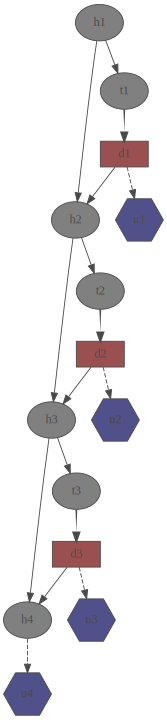

In [38]:
gnb.showInfluenceDiagram(pigs, size=10)